In [1]:
%pip install snap-stanford

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install comunity

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement comunity (from versions: none)
ERROR: No matching distribution found for comunity


In [ ]:
%pip install gzip

In [ ]:
%pip install python-louvain

In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Number of Nodes: 5242
Number of Edges: 14496
Degree: 1, Count: 1197
Degree: 2, Count: 1114
Degree: 3, Count: 776
Degree: 4, Count: 498
Degree: 5, Count: 296
Degree: 6, Count: 225
Degree: 7, Count: 159
Degree: 8, Count: 141
Degree: 9, Count: 99
Degree: 10, Count: 92
Degree: 11, Count: 66
Degree: 12, Count: 46
Degree: 13, Count: 57
Degree: 14, Count: 38
Degree: 15, Count: 48
Degree: 16, Count: 25
Degree: 17, Count: 43
Degree: 18, Count: 21
Degree: 19, Count: 18
Degree: 20, Count: 28
Degree: 21, Count: 16
Degree: 22, Count: 12
Degree: 23, Count: 44
Degree: 24, Count: 8
Degree: 25, Count: 8
Degree: 26, Count: 7
Degree: 27, Count: 3
Degree: 28, Count: 5
Degree: 29, Count: 3
Degree: 30, Count: 8
Degree: 31, Count: 9
Degree: 32, Count: 3
Degree: 33, Count: 9
Degree: 34, Count: 37
Degree: 35, Count: 1
Degree: 36, Count: 2
Degree: 37, Count: 5
Degree: 38, Count: 1
Degree: 40, Count: 1
Degree: 41, Count: 3
Degree: 42, Count: 19
Degree: 43, Count: 2
Degree: 44, Count: 1
Degree: 45, Count: 13
Degr

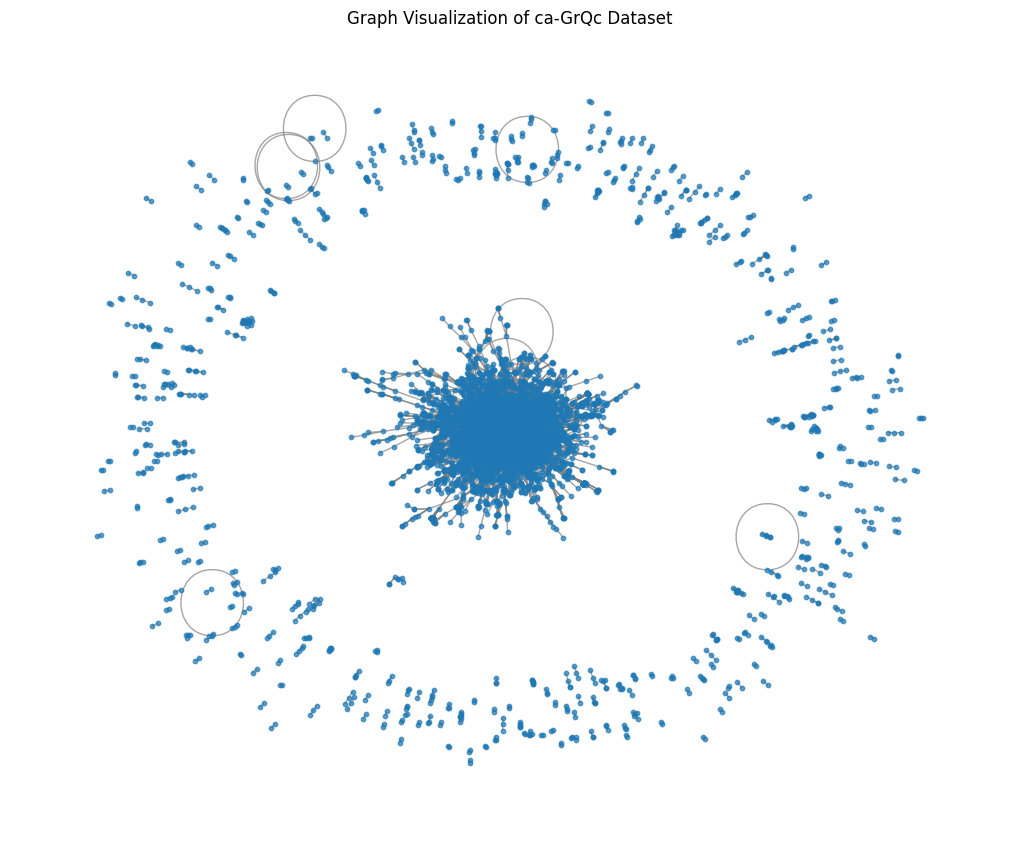

Clustering Coefficient: 0.5304030148368244
Graph Diameter: 16
Number of Connected Components: 355


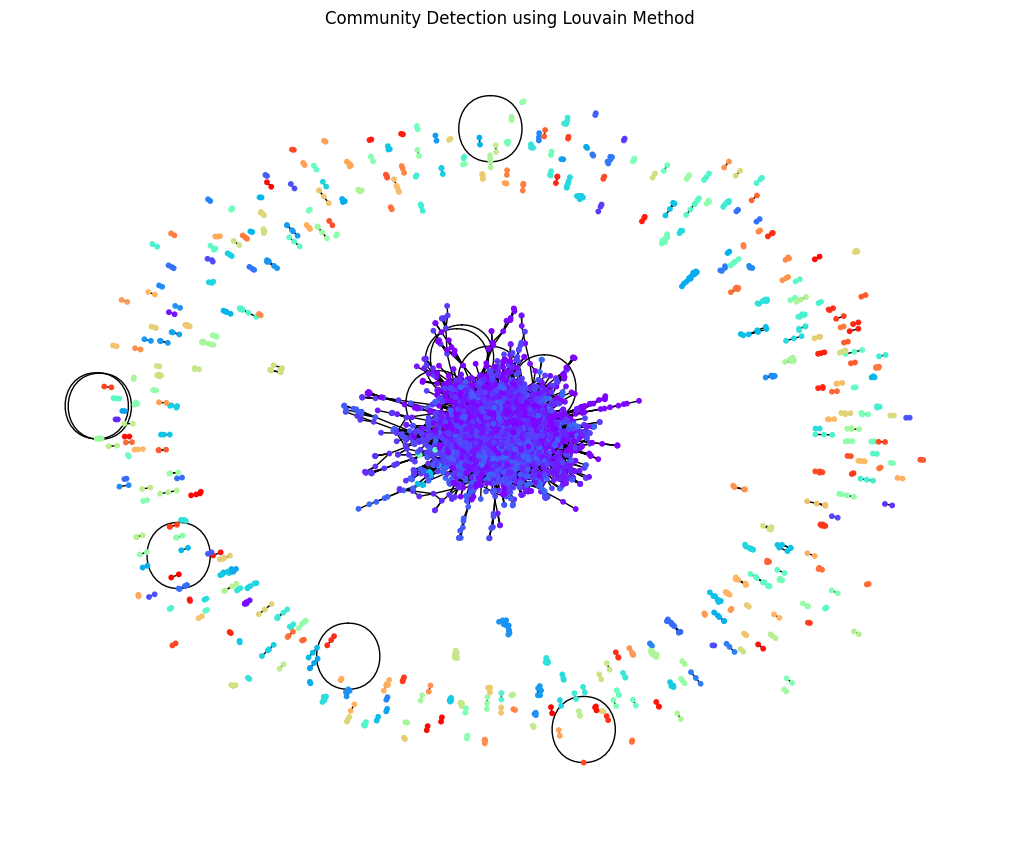

In [3]:
import snap
import gzip
import networkx as nx
import community as community_louvain

import matplotlib.pyplot as plt


def load_graph_from_gz(file_path):
    G = snap.TUNGraph.New()  # Create an undirected graph

    with gzip.open(file_path, "rt") as f:  # Read as text
        for line in f:
            if line.startswith("#"):  # Ignore comments in the file
                continue
            u, v = map(int, line.strip().split())  # Read node pairs
            if not G.IsNode(u):
                G.AddNode(u)
            if not G.IsNode(v):
                G.AddNode(v)
            G.AddEdge(u, v)

    return G


def snap_to_nx(snap_graph):
    nx_graph = nx.Graph()
    for node in snap_graph.Nodes():
        nx_graph.add_node(node.GetId())
    for edge in snap_graph.Edges():
        nx_graph.add_edge(edge.GetSrcNId(), edge.GetDstNId())
    return nx_graph


# Load the graph
file_path = 'ca-GrQc.txt.gz'
snap_graph = load_graph_from_gz(file_path)

# Basic graph properties
print("Number of Nodes:", snap_graph.GetNodes())
print("Number of Edges:", snap_graph.GetEdges())

# Compute degree distribution
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(snap_graph, DegToCntV)

# Print degree distribution
for item in DegToCntV:
    print(f"Degree: {item.GetVal1()}, Count: {item.GetVal2()}")

# Convert to NetworkX graph
nx_graph = snap_to_nx(snap_graph)

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, node_size=10, edge_color="gray", alpha=0.7, with_labels=False)
plt.title("Graph Visualization of ca-GrQc Dataset")
plt.show()

# Compute key metrics
clustering_coeff = snap.GetClustCf(snap_graph)
print("Clustering Coefficient:", clustering_coeff)

diameter = snap.GetBfsFullDiam(snap_graph, 100, False)
print("Graph Diameter:", diameter)

components = snap.TCnComV()
snap.GetWccs(snap_graph, components)
print("Number of Connected Components:", len(components))

# Community detection
partition = community_louvain.best_partition(nx_graph)

# Visualize communities
plt.figure(figsize=(10, 8))
nx.draw(
    nx_graph,
    node_color=list(partition.values()),
    node_size=10,
    cmap=plt.cm.rainbow,
    with_labels=False,
)
plt.title("Community Detection using Louvain Method")
plt.show()


In [9]:
# Compute key properties
num_nodes = snap_graph.GetNodes()
num_edges = snap_graph.GetEdges()
clustering_coeff = snap.GetClustCf(snap_graph)
diameter = snap.GetBfsFullDiam(snap_graph, 100, False)

print(f"Graph Statistics:")
print(f"- Nodes: {num_nodes}")
print(f"- Edges: {num_edges}")
print(f"- Clustering Coefficient: {clustering_coeff:.4f}")
print(f"- Approx. Diameter: {diameter}")

Graph Statistics:
- Nodes: 5242
- Edges: 14496
- Clustering Coefficient: 0.5304
- Approx. Diameter: 14


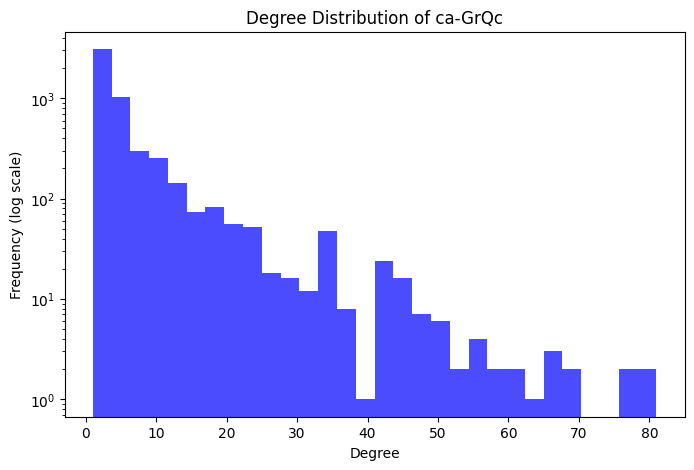

In [7]:
# Compute and plot degree distribution
degrees = [deg for _, deg in nx_graph.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=30, color="blue", alpha=0.7)
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.title("Degree Distribution of ca-GrQc")
plt.show()

In [5]:
# Compute largest connected component
largest_cc = max(nx.connected_components(nx_graph), key=len)
subgraph = nx_graph.subgraph(largest_cc)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

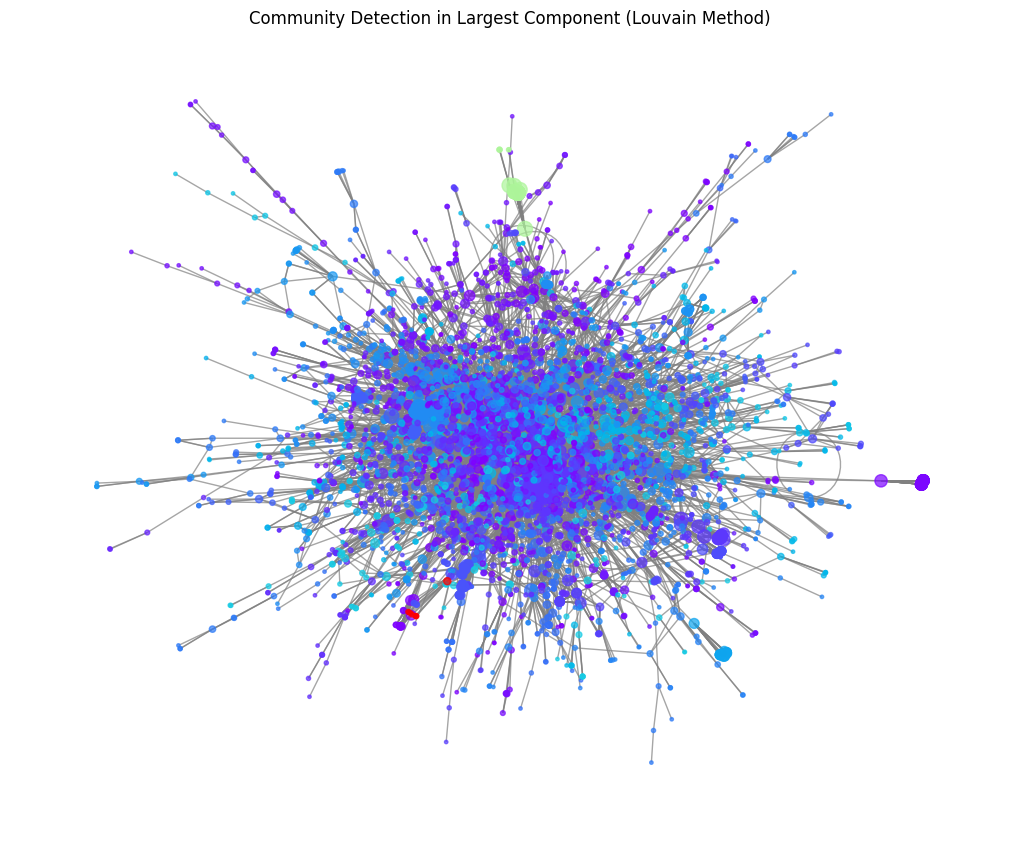

In [8]:
# Improved graph visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph, seed=42)  # Better node positioning

# Filter partition values for nodes in the subgraph
node_colors = [partition[node] for node in subgraph.nodes()]

nx.draw(
    subgraph,
    pos,
    node_color=node_colors,
    node_size=[(d+1) * 3 for _, d in subgraph.degree()],  # Scale node size by degree
    cmap=plt.cm.rainbow,
    edge_color="gray",
    alpha=0.7,
    with_labels=False
)
plt.title("Community Detection in Largest Component (Louvain Method)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.rainbow), label="Community ID")
plt.show()

Detected 417 communities using Walktrap


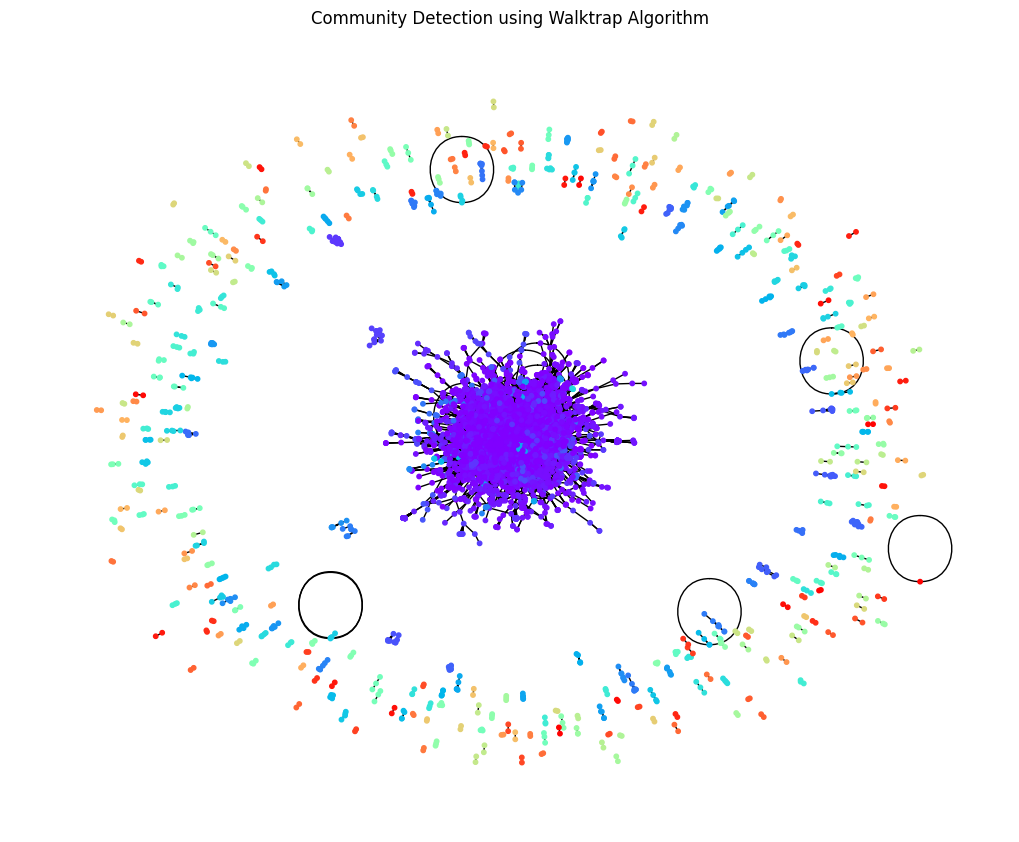

In [11]:
# 1. Walktrap Algorithm (Random Walk)
from networkx.algorithms.community import greedy_modularity_communities
walktrap_communities = list(greedy_modularity_communities(nx_graph))
print(f"Detected {len(walktrap_communities)} communities using Walktrap")

# Assign colors for visualization
walktrap_partition = {}
for i, comm in enumerate(walktrap_communities):
    for node in comm:
        walktrap_partition[node] = i

# Visualize Walktrap Communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph, seed=42)
nx.draw(nx_graph, pos, node_color=[walktrap_partition[n] for n in nx_graph.nodes()],
        node_size=10, cmap=plt.cm.rainbow, with_labels=False)
plt.title("Community Detection using Walktrap Algorithm")
plt.show()

In [13]:
from networkx.algorithms.community import asyn_fluidc, girvan_newman

Detected 356 communities using Girvan-Newman


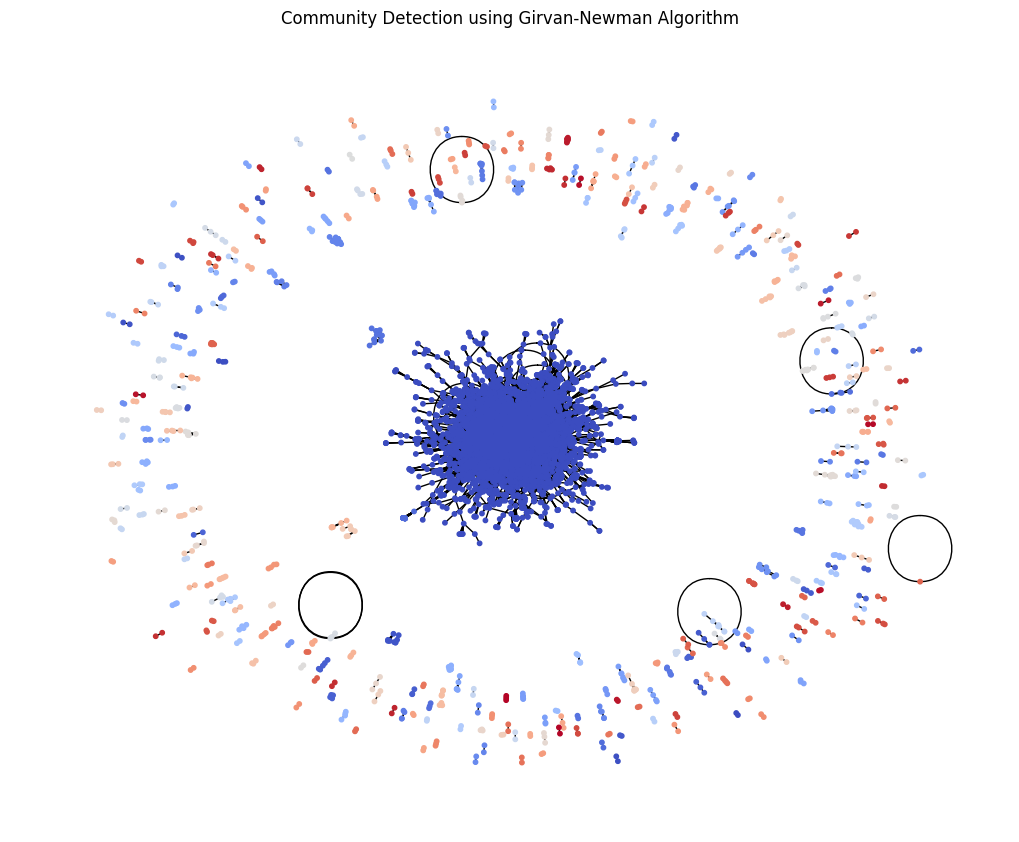

In [14]:
# 2. Girvan-Newman Algorithm (Edge Betweenness)
gn_generator = girvan_newman(nx_graph)
gn_communities = next(gn_generator)  # Get first split
gn_partition = {node: i for i, comm in enumerate(gn_communities) for node in comm}

print(f"Detected {len(gn_communities)} communities using Girvan-Newman")

# Visualize Girvan-Newman Communities
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, pos, node_color=[gn_partition[n] for n in nx_graph.nodes()],
        node_size=10, cmap=plt.cm.coolwarm, with_labels=False)
plt.title("Community Detection using Girvan-Newman Algorithm")
plt.show()

In [17]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.6 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.6 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.6 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.6 MB 2.2 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/11.6 MB 2.2 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.6 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.6 MB 2.1 MB/s eta 0:00:04
   -------------- ------------------------- 4.2/11.6 MB 2.1 MB/s eta 0:00:04
   ----------------- ---------------------- 5.0/

In [18]:
import numpy as np
import seaborn as sns

Detected 356 communities using Girvan-Newman


IndexError: index 8579 is out of bounds for axis 0 with size 5242

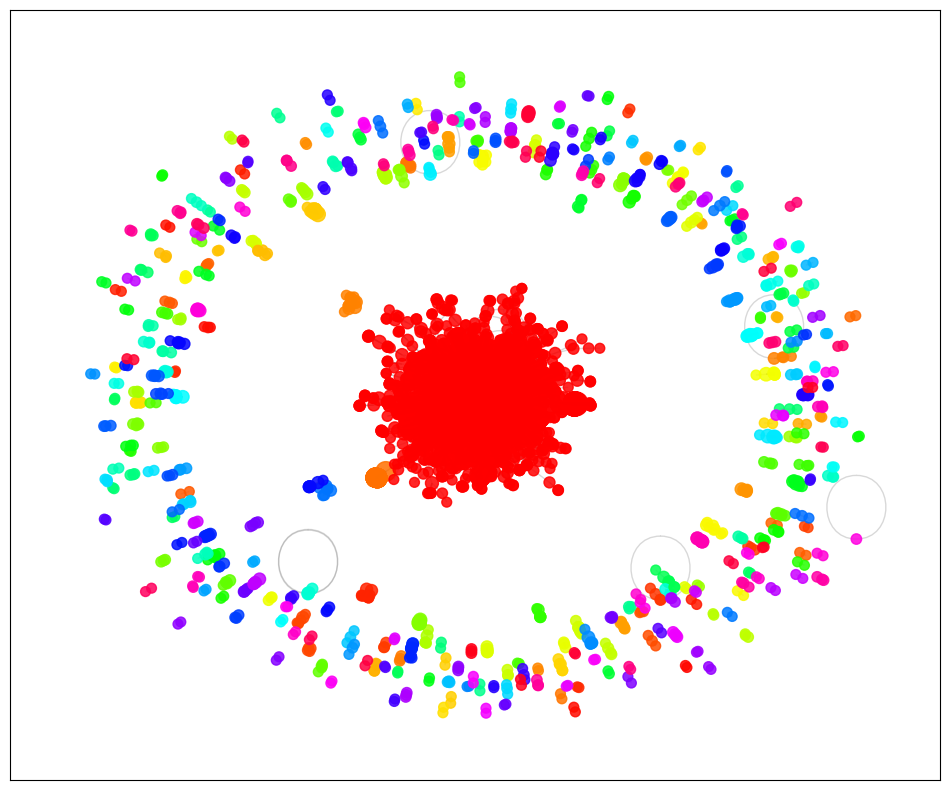

In [20]:
# Girvan-Newman Community Detection
gn_generator = girvan_newman(nx_graph)
gn_communities = next(gn_generator)  # First partition
gn_partition = {node: i for i, comm in enumerate(gn_communities) for node in comm}
num_communities = len(set(gn_partition.values()))

print(f"Detected {num_communities} communities using Girvan-Newman")

# Compute node importance (size based on degree)
node_sizes = np.array([nx_graph.degree(n) for n in nx_graph.nodes()])
node_sizes = 50 + (500 * (node_sizes - node_sizes.min()) / (node_sizes.max() - node_sizes.min()))  # Normalize sizes

# Compute edge betweenness for edge transparency
edge_betweenness = nx.edge_betweenness_centrality(nx_graph)
edge_transparency = np.array(list(edge_betweenness.values()))
edge_transparency = (edge_transparency - edge_transparency.min()) / (edge_transparency.max() - edge_transparency.min())  # Normalize

# Define node colors based on communities
palette = sns.color_palette("hsv", num_communities)
node_colors = [palette[gn_partition[n]] for n in nx_graph.nodes()]

# Improved Graph Visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(nx_graph, seed=42)  # Force-directed layout

nx.draw_networkx_edges(nx_graph, pos, alpha=0.3, edge_color="gray")  # Faint edges
nx.draw_networkx_nodes(nx_graph, pos, node_color=node_colors, node_size=node_sizes, alpha=0.85)  # Nodes with color
nx.draw_networkx_labels(nx_graph, pos, labels={n: n for n in nx_graph.nodes() if node_sizes[n] > 300}, font_size=9, font_color="black")  # Label high-degree nodes

plt.title(f"Girvan-Newman Community Detection ({num_communities} Communities)", fontsize=14)
plt.show()

Top 10 edges by betweenness centrality:
Edge (14746, 13801) -> Score: 0.00791
Edge (18408, 6583) -> Score: 0.00722
Edge (9572, 13929) -> Score: 0.00682
Edge (17655, 13801) -> Score: 0.00643
Edge (1488, 13801) -> Score: 0.00630
Edge (2710, 14599) -> Score: 0.00613
Edge (17038, 18866) -> Score: 0.00601
Edge (17738, 7650) -> Score: 0.00585
Edge (14924, 18408) -> Score: 0.00583
Edge (14485, 23708) -> Score: 0.00566


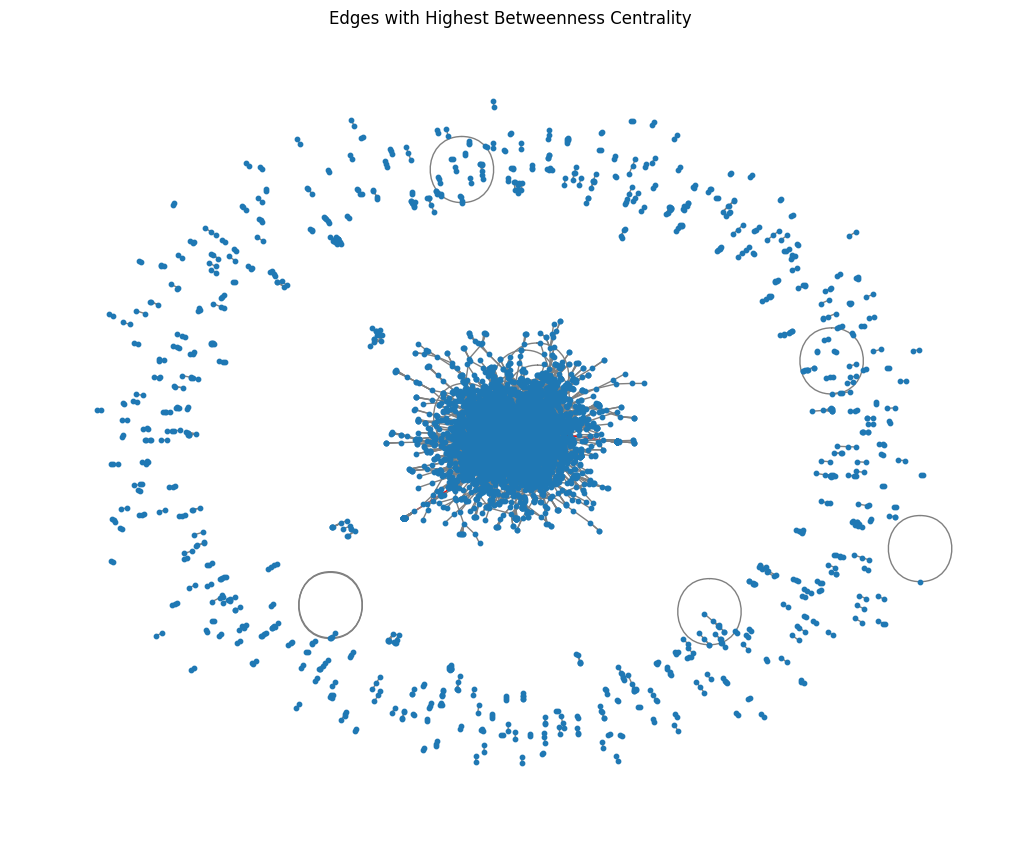

In [21]:
# 3. Edge Betweenness Centrality
edge_betweenness = nx.edge_betweenness_centrality(nx_graph)
top_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 edges by betweenness centrality:")
for edge, score in top_edges:
    print(f"Edge {edge} -> Score: {score:.5f}")

# Highlight high-betweenness edges
plt.figure(figsize=(10, 8))
edges, scores = zip(*top_edges)
nx.draw(nx_graph, pos, edge_color=["red" if e in edges else "gray" for e in nx_graph.edges()],
        node_size=10, with_labels=False)
plt.title("Edges with Highest Betweenness Centrality")
plt.show()